In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

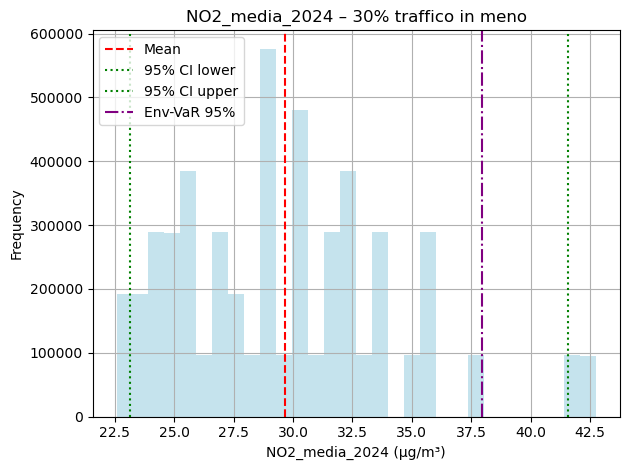

 Risultati NO2:
• Media simulata: 29.67 µg/m³
• CI 95%: [23.14, 41.55]
• Env-VaR 95%: 37.93
• Simulazioni effettuate: 5000000


In [ ]:
import pandas as pd
from simulate import simulate_pollution  
# === 1. Carica i file Excel ===
no2 = pd.read_excel("data/NO2.xlsx")
traffico = pd.read_excel("data/traffico Astrade 2024.xlsx")

# === 2. Crea colonne pulite ===
no2["data"] = pd.to_datetime(no2["data"], dayfirst=True)
no2["NO2_media_2024"] = pd.to_numeric(no2["Media (2024)"], errors="coerce")

traffico["data"] = pd.to_datetime(traffico["data"], dayfirst=True)
traffico["traffico_media_2024"] = pd.to_numeric(traffico["Media (2024)"], errors="coerce")

# === 3. Merge dei due DataFrame sulle date ===
df = pd.merge(
    no2[["data", "NO2_media_2024"]],
    traffico[["data", "traffico_media_2024"]],
    on="data"
).dropna()

N_SIM = 1000
# Passa il DataFrame finale alla funzioneale alla funzione ===
results = simulate_pollution(df, "NO2_media_2024", "traffico_media_2024", reduction_pct=0.3,n_sim=N_SIM, plot=True)

print(f" Risultati NO2:")
print(f"• Media simulata: {results['mean']:.2f} µg/m³")
print(f"• CI 95%: [{results['ci_lower']:.2f}, {results['ci_upper']:.2f}]")
print(f"• Env-VaR 95%: {results['env_var_95']:.2f}")
print(f"• Simulazioni effettuate: {N_SIM}")

